## 画像解析
## トーンカーブ編

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

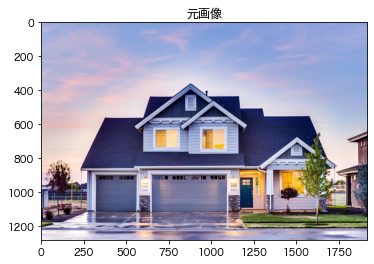

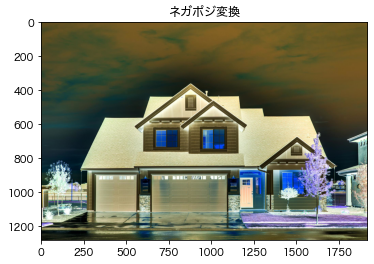

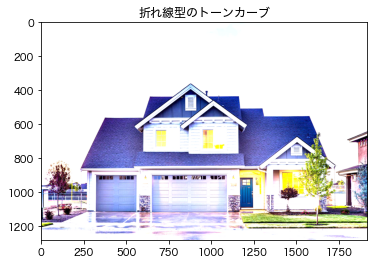

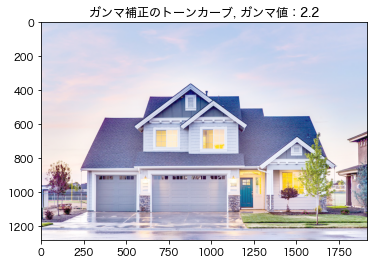

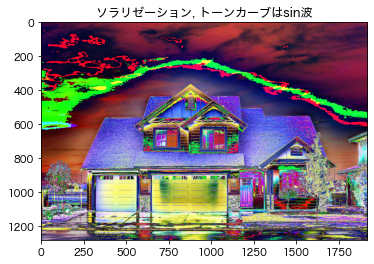

In [56]:
# 画像の読み込みと元画像の表示
house_bgr = cv2.imread('./../fig_raw/house.jpg')
house_rgb = cv2.cvtColor(house_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(house_rgb)
plt.title('元画像')
plt.show()

# ネガポジ変換
house_rgb_negaposi = 255 - house_rgb
plt.imshow(house_rgb_negaposi)
plt.title('ネガポジ変換')
plt.show()

# 折れ線グラフのトーンカーブ
def toneCurve_linear(frame, n=2):
    '''
    トーンカーブの定義
    if 画素値 < 128:
        画素値 = 画素値×1
    else:
        画素値 = 255
    '''
    look_up_table = np.zeros((256,1), dtype = 'uint8')
    for i in range(256):
        if i < 256 / n:
            look_up_table[i][0] = i * n
        else:
            look_up_table[i][0] = 255
    return cv2.LUT(frame, look_up_table)

plt.imshow(toneCurve_linear(house_rgb))
plt.title('折れ線型のトーンカーブ')
plt.show()

# ガンマ補正
gamma = 2.2
x = np.arange(256)
y = 255 * (x/255)**(1/gamma)

house_gamma = cv2.LUT(house_rgb, y).astype('uint8')
plt.imshow(house_gamma)
plt.title(f'ガンマ補正のトーンカーブ, ガンマ値：{gamma}')
plt.show()

# ソラリゼーション
x = np.arange(256)
y = 255 - 127.5 * np.cos(x/30) + 127.5

house_sola = cv2.LUT(house_rgb, y).astype('uint8')
plt.imshow(house_sola)
plt.title(f'ソラリゼーション, トーンカーブはsin波')
plt.show()